In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('/Users/mac/Desktop/учеба/DANO_final/project_round/raw_set.xlsx')
df = df.drop(columns=['item_id'])
df.head()

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0
1,Собаки,25,False,2,Собака в добрые руки,20,49,7,осталась одна девочка.Мама лайка папа не известен,Лайка,Ж,NaN,-1,68,4.0,4.8,484,10,17
2,Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60.0,1,99,0.0,0.0,13,0,1
3,Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7.0,1,142,2.0,5.0,36,0,1
4,Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5


In [3]:
df['category'].value_counts()

category
Кошки     27230
Собаки    22770
Name: count, dtype: int64

In [4]:
df['gender'].value_counts()

gender
Ж    25249
М    24751
Name: count, dtype: int64

In [5]:
df.dtypes

category                   object
days_active                 int64
has_video                    bool
photo_count                 int64
title                      object
title_length                int64
description_length          int64
description_word_count      int64
DescriptionRu              object
breed                      object
gender                     object
age                       float64
price                       int64
seller_n_month              int64
seller_count_reviews      float64
seller_rating             float64
page_views                  int64
contacts                    int64
favorites                   int64
dtype: object

In [6]:
df.describe()

,days_active,photo_count,title_length,description_length,description_word_count,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,41492.000000,5.000000e+04,50000.000000,48594.000000,48487.000000,50000.000000,50000.000000,50000.000000
mean,18.051080,3.723880,20.072420,284.722140,40.655440,17.188971,7.274145e+03,63.937220,7.106618,3.196112,137.963400,2.472020,7.051620
std,8.792304,2.439876,10.361533,299.344023,43.804078,29.042121,5.549400e+05,45.326206,16.988369,2.308036,393.870037,7.503475,23.194765
min,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,13.000000,103.000000,14.000000,3.000000,0.000000e+00,25.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,25.000000,3.000000,19.000000,187.000000,26.000000,6.000000,0.000000e+00,57.000000,2.000000,4.900000,34.000000,0.000000,1.000000
75%,25.000000,5.000000,27.000000,355.000000,50.000000,19.200000,1.000000e+01,100.000000,7.000000,5.000000,119.000000,2.000000,6.000000
max,25.000000,10.000000,50.000000,5548.000000,837.000000,324.000000,1.000001e+08,192.000000,575.000000,5.000000,24336.000000,264.000000,1406.000000


In [7]:
df.isnull().sum()

category                      0
days_active                   0
has_video                     0
photo_count                   0
title                         0
title_length                  0
description_length            0
description_word_count        0
DescriptionRu                 0
breed                     34180
gender                        0
age                        8508
price                         0
seller_n_month                0
seller_count_reviews       1406
seller_rating              1513
page_views                    0
contacts                      0
favorites                     0
dtype: int64

In [8]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()

,days_active,photo_count,title_length,description_length,description_word_count,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,5,4,18,1155,184,108.0,0,35,1.0,5.0,0,0,0
1,25,2,20,49,7,NaN,-1,68,4.0,4.8,484,10,17
2,25,4,10,354,55,60.0,1,99,0.0,0.0,13,0,1
3,25,1,17,869,123,7.0,1,142,2.0,5.0,36,0,1
4,18,4,10,30,6,36.0,0,4,0.0,0.0,33,0,5


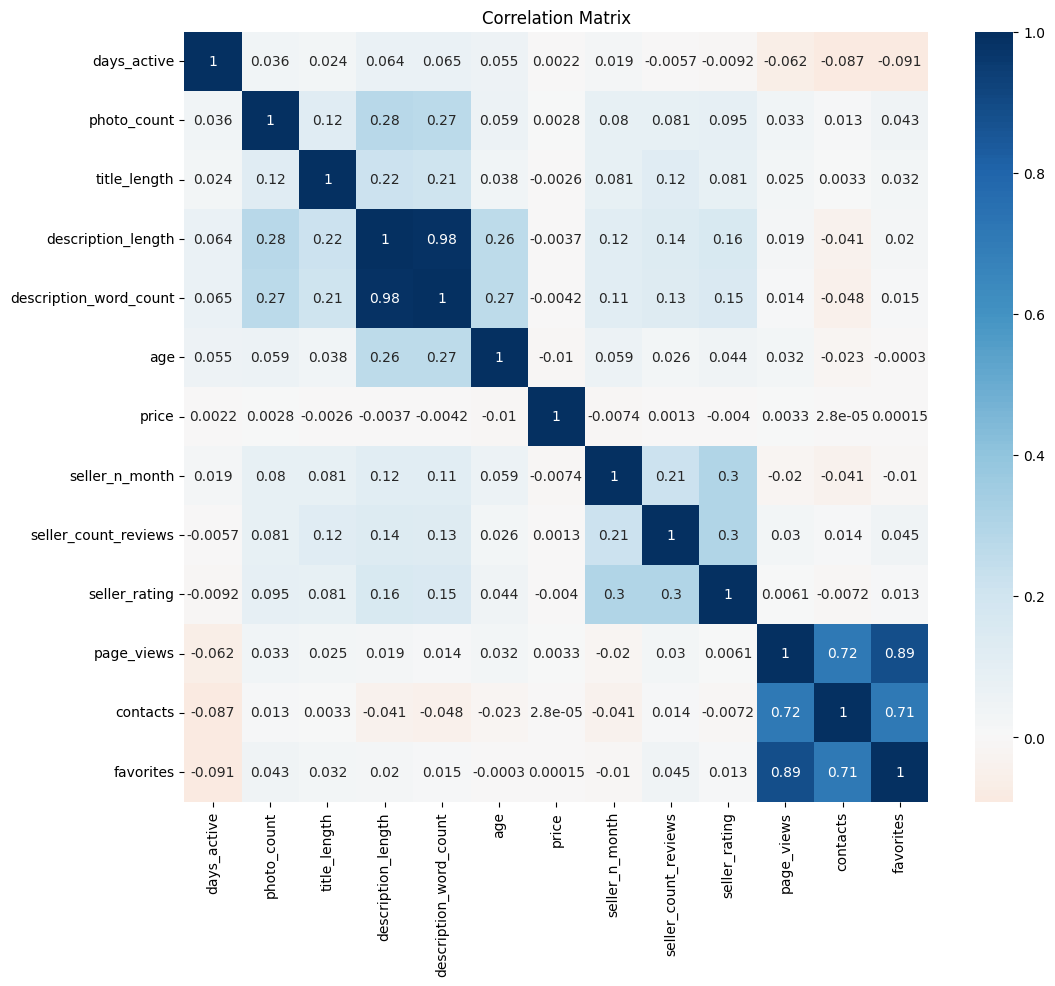

In [9]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu', center=0)
plt.title('Correlation Matrix')
plt.show()

In [10]:
df.head(10)

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0
1,Собаки,25,False,2,Собака в добрые руки,20,49,7,осталась одна девочка.Мама лайка папа не известен,Лайка,Ж,NaN,-1,68,4.0,4.8,484,10,17
2,Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60.0,1,99,0.0,0.0,13,0,1
3,Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7.0,1,142,2.0,5.0,36,0,1
4,Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5
5,Собаки,25,False,6,Собака в добрые руки щенок,26,812,111,В деревне Кузовино случилась большая беда! Две...,Овчарка,М,NaN,0,14,0.0,0.0,68,2,3
6,Кошки,25,False,2,"Отдалим кота в добрые руки, русская голубая",43,86,17,"Хороший кот , отдадим даром , желтые глаза, ко...",Русская голубая,М,NaN,-1,15,0.0,0.0,171,2,7
7,Кошки,14,False,5,Мурчики ищут дом,16,563,85,Доброго дня. К работе прибилась кошка с котенк...,NaN,Ж,5.0,0,52,12.0,3.8,22,0,1
8,Собаки,25,False,9,Щенки шпица,11,395,43,Эксклюзивные цветные шпицы!\nПродаются шикарны...,Шпиц,Ж,NaN,25000,61,0.0,0.0,218,3,10
9,Собаки,17,False,4,Померансеий шпиц мальчик,24,96,13,"Мальчик 3 года, Чемпион России. \nПод выставки...",Шпиц,М,36.0,-1,134,9.0,5.0,181,4,9


In [11]:
df['contacts'].describe()

count    50000.000000
mean         2.472020
std          7.503475
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        264.000000
Name: contacts, dtype: float64

In [12]:
df['seller_rating'].value_counts()

seller_rating
5.0    23784
0.0    16131
4.9     1425
4.8     1250
4.7      810
4.6      806
4.5      574
4.0      508
4.3      486
3.0      468
4.4      442
3.7      434
1.0      411
4.2      368
4.1      100
2.3       76
3.8       73
3.4       68
3.5       66
3.9       62
2.0       51
2.6       23
3.3       16
3.2       13
3.6       12
2.7       12
2.9        6
1.5        4
2.5        2
1.8        2
1.6        2
1.9        1
1.7        1
Name: count, dtype: int64

In [13]:
df['breed'].isna().value_counts()

breed
True     34180
False    15820
Name: count, dtype: int64

In [14]:
df_min1 = df[df['price'] == -1]
df_min1

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
1,Собаки,25,False,2,Собака в добрые руки,20,49,7,осталась одна девочка.Мама лайка папа не известен,Лайка,Ж,NaN,-1,68,4.0,4.8,484,10,17
6,Кошки,25,False,2,"Отдалим кота в добрые руки, русская голубая",43,86,17,"Хороший кот , отдадим даром , желтые глаза, ко...",Русская голубая,М,NaN,-1,15,0.0,0.0,171,2,7
9,Собаки,17,False,4,Померансеий шпиц мальчик,24,96,13,"Мальчик 3 года, Чемпион России. \nПод выставки...",Шпиц,М,36.0,-1,134,9.0,5.0,181,4,9
13,Кошки,25,False,3,Кошка,5,63,11,Ищет дом котёнок. Девочка. 3 месяца. Кушает вс...,NaN,Ж,3.0,-1,25,0.0,0.0,16,0,0
15,Кошки,23,False,3,Малыш Джастин,13,272,37,"Котенок мальчик, возраст 2 месяца. Красивый,...",NaN,М,2.0,-1,157,5.0,5.0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,Кошки,17,False,5,Кот,3,337,59,"Добрый день, ищу дом и любищую семью для котен...",NaN,М,4.0,-1,1,NaN,NaN,22,0,3
49982,Кошки,25,False,1,Шотландская вислоухая кошка бесплатно,37,36,5,Приученная кошка.Отдам в добрые руки,Шотландская,Ж,NaN,-1,59,1.0,5.0,40,1,0
49987,Собаки,17,False,6,Щенок в добрые руки бесплатно,29,284,39,Очаровательный песик ищет дом. Песику примерно...,NaN,М,4.0,-1,9,0.0,0.0,41,0,2
49988,Собаки,25,False,10,Мини Кавалерочка,16,435,49,Предлагаем на подушечку мини девочку Кинг чарл...,Спаниель,Ж,3.5,-1,5,0.0,0.0,732,36,39


In [15]:
df_0 = df[df['price'] == 0]
df_0

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0
4,Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5
5,Собаки,25,False,6,Собака в добрые руки щенок,26,812,111,В деревне Кузовино случилась большая беда! Две...,Овчарка,М,NaN,0,14,0.0,0.0,68,2,3
7,Кошки,14,False,5,Мурчики ищут дом,16,563,85,Доброго дня. К работе прибилась кошка с котенк...,NaN,Ж,5.0,0,52,12.0,3.8,22,0,1
11,Кошки,4,False,6,Кошечка в добрые руки,21,399,56,"Друзья! Пристраиваем в хорошие руки умную, доб...",NaN,Ж,84.0,0,48,20.0,4.8,45,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,Собаки,8,False,4,Собака в добрые руки,20,217,27,"Девочка в добрые руки, возраст ориентировочно ...",Дог,Ж,24.0,0,57,6.0,5.0,43,0,3
49991,Кошки,25,False,3,Кошка,5,146,17,"Необычной красоты кошечка, 1,5 года\n Большое ...",NaN,Ж,18.0,0,25,3.0,5.0,11,0,0
49993,Собаки,25,False,4,Собака в добрые руки,20,234,35,Отдадим в добрые руки песика по кличке Атос.\n...,NaN,М,36.0,0,89,10.0,5.0,8,2,0
49997,Кошки,25,False,3,Кошка в дар,11,294,43,Василий 😻❤️🫶Васенька 🥰\nВот такой шикарный кот...,NaN,Ж,2.5,0,35,1.0,5.0,15,2,2


In [16]:
df['photo_count'].unique()

array([ 4,  2,  1,  6,  5,  9,  3,  7,  8, 10,  0])

In [17]:
from scipy import stats

In [18]:
print(df.groupby('category')['page_views'].mean())

category
Кошки      93.167205
Собаки    191.533904
Name: page_views, dtype: float64


In [19]:
group1 = df[df['category'] == 'Кошки']['page_views']
group2 = df[df['category'] == 'Собаки']['page_views']

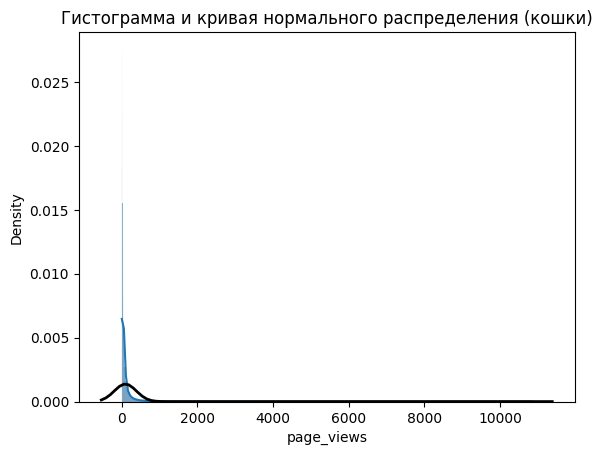

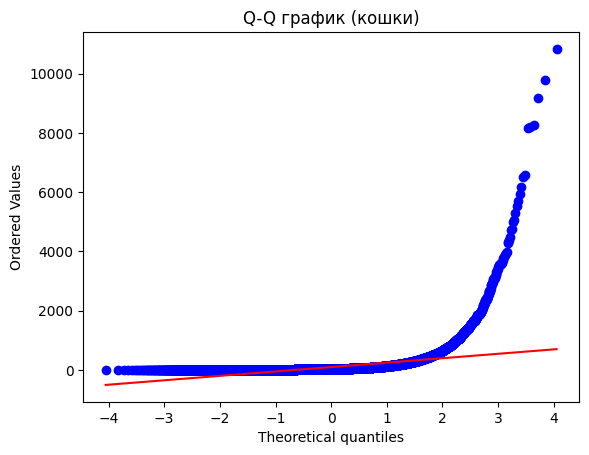

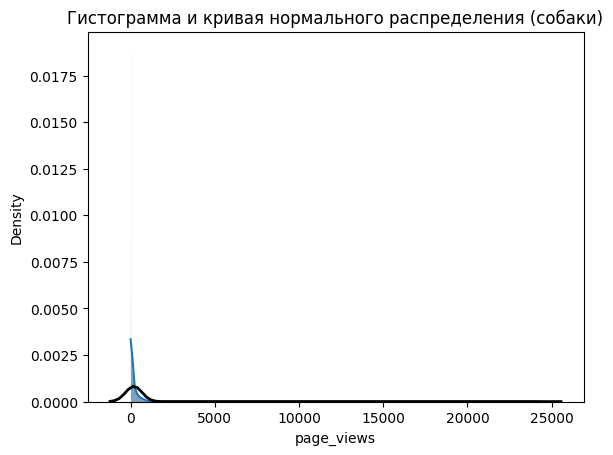

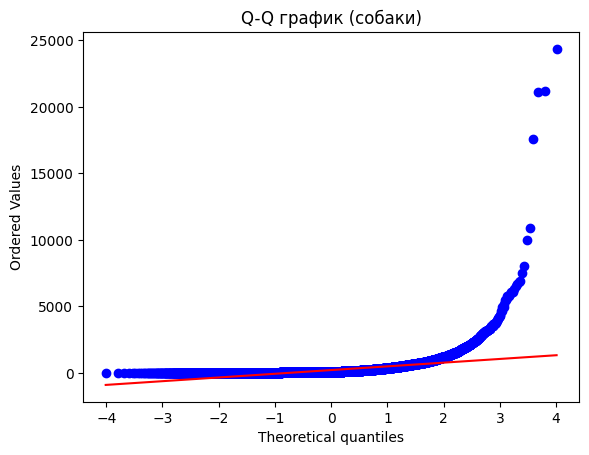

In [20]:
def plot_histogram_with_normal(data, title):
    sns.histplot(data, kde=True, stat='density')
    mean, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(title)
    plt.show()

def plot_qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

plot_histogram_with_normal(group1, "Гистограмма и кривая нормального распределения (кошки)")
plot_qq_plot(group1, "Q-Q график (кошки)")


plot_histogram_with_normal(group2, "Гистограмма и кривая нормального распределения (собаки)")
plot_qq_plot(group2, "Q-Q график (собаки)")

In [21]:
u_statistic, p_value = stats.mannwhitneyu(group1, group2)
print("\nРезультат U-критерия Манна-Уитни:")

u_statistic, p_value


Результат U-критерия Манна-Уитни:


(244446275.0, 0.0)

In [22]:
df.head(10)

,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0
1,Собаки,25,False,2,Собака в добрые руки,20,49,7,осталась одна девочка.Мама лайка папа не известен,Лайка,Ж,NaN,-1,68,4.0,4.8,484,10,17
2,Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60.0,1,99,0.0,0.0,13,0,1
3,Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7.0,1,142,2.0,5.0,36,0,1
4,Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5
5,Собаки,25,False,6,Собака в добрые руки щенок,26,812,111,В деревне Кузовино случилась большая беда! Две...,Овчарка,М,NaN,0,14,0.0,0.0,68,2,3
6,Кошки,25,False,2,"Отдалим кота в добрые руки, русская голубая",43,86,17,"Хороший кот , отдадим даром , желтые глаза, ко...",Русская голубая,М,NaN,-1,15,0.0,0.0,171,2,7
7,Кошки,14,False,5,Мурчики ищут дом,16,563,85,Доброго дня. К работе прибилась кошка с котенк...,NaN,Ж,5.0,0,52,12.0,3.8,22,0,1
8,Собаки,25,False,9,Щенки шпица,11,395,43,Эксклюзивные цветные шпицы!\nПродаются шикарны...,Шпиц,Ж,NaN,25000,61,0.0,0.0,218,3,10
9,Собаки,17,False,4,Померансеий шпиц мальчик,24,96,13,"Мальчик 3 года, Чемпион России. \nПод выставки...",Шпиц,М,36.0,-1,134,9.0,5.0,181,4,9


In [23]:
import nltk
nltk.download('vader_lexicon', download_dir='/Users/mac/Desktop/учеба/DANO_final/project_round') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/Desktop/учеба/DANO_final/project_round...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_an = df[['DescriptionRu', 'page_views']]
df_an

,DescriptionRu,page_views
0,Кто это? \nПлохой мальчик? \nМафиозный авторит...,0
1,осталась одна девочка.Мама лайка папа не известен,484
2,"Ласковый, деликатный и спокойный котик. Ходит ...",13
3,Кот Суслик возраст около 7 месяцев.\nНашла кот...,36
4,Кот зовут Вася примерно 3 года,33
...,...,...
49995,Котёнок ищет заботливых хозяев🙏🏻. Возраст прим...,15
49996,"Хороший, добрый кобель, не агрессивный, послуш...",543
49997,Василий 😻❤️🫶Васенька 🥰\nВот такой шикарный кот...,15
49998,"Маленькая Молли 1,5 года ищет свою семью! Молл...",5


In [25]:
analyzer = SentimentIntensityAnalyzer()





In [26]:
df_an['positivity'] = df_an['DescriptionRu'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_88084/3479780459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_an['positivity'] = df_an['DescriptionRu'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [ ]:
df_an.tail(40)

,DescriptionRu,page_views,positivity
49960,"Кошечка Нюша, молодая, 9 мес, отловили на стер...",1,0.0
49961,"Ищет дом и любящую семью щеночек-девочка,возра...",15,0.0
49962,"Девочка шотландская вислоухая (ny25), несет ко...",60,0.0
49963,"Кошечка, черно-белого окраса, 2,5 мес., от мам...",19,0.0
49964,"Котик Малыш ищет дом!\n1.5 года, кастрирован и...",11,0.0
49965,котик отдаю. из за того что переезжаем. 4 меся...,94,0.0
49966,Дружелюбные любят поиграть обоим по 8 месяцев,8,0.0
49967,Котенок подросток в добрые руки.... Очень крас...,23,0.0
49968,Щенок Bенгeрской Выжлы 14.07.2023\nЩенoк пpи...,349,0.0
49969,"Продаю котенка канадский сфинкс ,мальчик .очен...",455,0.0
